# data analytics for Dartpost

### undetecability for a sock account

We define the undetectability of a sock account a to be $undet(a)=1/e^{(T-D_a)}$ where T is the total time (6 days) and D_a is T if the sock is undetected or the earliest day on which a was reported to be a sock. Thus, an undetected sock would have a success rate of 1.

### undetectability for a sock creation strategy

We define the undetectability of a sock creation strategy S to be $undet(S) = \frac{\sum_{a\in Create(S)} undet(a) }{|Create(S)|}$ where Create(S) is the set of sock accounts created using strategy S.


In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.size":12,
})

In [2]:
df_users = pd.read_csv("./data/users", delimiter="\t")
df_follow = pd.read_csv("./data/follow", delimiter="\t")
df_report= pd.read_csv("./data/reportusers", delimiter="\t")

print(df_users.shape)

(478, 16)


In [3]:
df_assigns = pd.concat(
    [
    pd.read_csv("./assigns/sockpuppet_assigned.csv"),
    pd.read_csv("./assigns/observer_assigned.csv"),
    pd.read_csv("./assigns/participant_assigned.csv"),
    ],
    axis=0,
)

print(df_assigns.shape)

(457, 12)


In [4]:
df_users = pd.merge(df_users, df_assigns, on=["email", "username"], how="left")

print(df_users.shape)
display(df_users.head())

(478, 26)


,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,password_y,sock,topic_0,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,...,akkvyi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A3GKAXHBZFZRXU
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1977,ModBessler@dartpost.org,ModB,$2a$10$iyHu9zlIoZ5JW7ErGgfCvueRa3tMGPfx6GlkE//...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2292,Luke_6520@observer.com,Luke_6520,$2a$10$FpS2QW9J/S4aMJcTiQygGuyMwT7y57XEz/0MW33...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,...,mfwswz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A2NHFSO7GMM8QR
4,1980,dapang@dartpost.com,RuiboLiu,$2a$10$dxRTsGeeutRAWhpYOGTwwek2x2CgGxvKeEfKmqQ...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_posts = pd.read_csv("./data/posts_processed.csv")
df_comments = pd.read_csv("./data/comments", delimiter="\t")

df_posts["AuthorId"] = df_posts["AuthorId"].fillna(-1).astype(int)
df_comments["CommenterId"] = df_comments["CommenterId"].fillna(-1).astype(int)
df_comments["PostId"] = df_comments["PostId"].fillna(-1).astype(int)

display(df_posts.head())
display(df_comments.head())

,id,text,picture_url,parent_id,root_id,is_marked,tags,createdAt,updatedAt,AuthorId,is_trending
0,93,I think that we should move away from nuclear ...,NaN,NaN,NaN,False,"{nuclear,energy,enviroment}",2020-09-03 01:59:10.051+00,2020-09-04 13:08:51.133+00,2580,False
1,94,"Given the security put in place since 911, it ...",NaN,NaN,NaN,False,{TerroristAttack},2020-09-03 02:28:29.002+00,2020-09-04 13:08:51.133+00,2593,False
2,95,NaN,NaN,NaN,NaN,True,"{""""}",2020-09-03 02:31:10.028+00,2020-09-03 02:34:29.992+00,2611,False
3,96,It is crucial that the United States plays a r...,NaN,NaN,NaN,False,{Worldaffairs},2020-09-03 02:34:07.312+00,2020-09-04 13:08:51.133+00,2593,False
4,97,Strongly disapprove of a two percent annual ta...,NaN,NaN,NaN,False,{WealthTax},2020-09-03 02:36:27.825+00,2020-09-04 13:08:51.133+00,2593,False


,id,text,createdAt,updatedAt,PostId,CommenterId
0,68,California is leading the way: https://www.for...,2020-09-03 02:52:38.45+00,2020-09-03 02:52:38.459+00,97,2593
1,69,Not sure we are fully secure here. Technology ...,2020-09-03 02:54:01.828+00,2020-09-03 02:54:01.84+00,94,2719
2,79,"It makes sense, nature will still be around on...",2020-09-03 03:04:48.007+00,2020-09-03 03:04:48.02+00,105,2679
3,70,I feel like we are moving away from nuclear en...,2020-09-03 02:54:27.349+00,2020-09-03 02:54:27.362+00,93,2679
4,51,"Nuclear energy, with proper safety in place, i...",2020-09-03 02:19:56.218+00,2020-09-03 02:19:56.226+00,93,2593


In [6]:
print(f"{df_report.shape[0]} {df_users.shape[0]}")
display(df_users.head())
display(df_report.head())

46 478


,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,password_y,sock,topic_0,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,...,akkvyi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A3GKAXHBZFZRXU
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1977,ModBessler@dartpost.org,ModB,$2a$10$iyHu9zlIoZ5JW7ErGgfCvueRa3tMGPfx6GlkE//...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2292,Luke_6520@observer.com,Luke_6520,$2a$10$FpS2QW9J/S4aMJcTiQygGuyMwT7y57XEz/0MW33...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,...,mfwswz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A2NHFSO7GMM8QR
4,1980,dapang@dartpost.com,RuiboLiu,$2a$10$dxRTsGeeutRAWhpYOGTwwek2x2CgGxvKeEfKmqQ...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,report,createdAt,updatedAt,ReporterId,SuspectId
0,14,They do not go into enough detail and do not d...,2020-09-03 03:24:23.636+00,2020-09-03 03:24:23.636+00,2638,2604
1,15,"His comment, “thank you China,” is inappropria...",2020-09-03 19:38:37.22+00,2020-09-03 19:38:37.22+00,2593,2560
2,16,I think it is a bot account,2020-09-03 20:21:50.501+00,2020-09-03 20:21:50.501+00,2588,2604
3,17,Possible bot,2020-09-03 20:40:12.567+00,2020-09-03 20:40:12.567+00,2588,2638
4,18,Bot?,2020-09-04 13:31:00.079+00,2020-09-04 13:31:00.079+00,2588,2658


In [7]:
stop_time = pd.to_datetime("2020-09-08 23:59:59+00")
day_timedelta = pd.Timedelta(1, "day")
total_timedelta = pd.Timedelta(1, "day")

### process reports

In [8]:
report_clean = df_report[["SuspectId", "createdAt"]].groupby("SuspectId").min().reset_index()
report_clean["ReportToLast"] = (pd.to_datetime(report_clean["createdAt"]) - stop_time) / day_timedelta
report_clean = report_clean[["SuspectId", "ReportToLast"]]

In [9]:
df_puppet = df_users[df_users["isPuppet"] == "t"]

df_puppet = pd.merge(df_puppet, report_clean, left_on="id", right_on="SuspectId", how="left").drop("SuspectId", axis=1)

print(df_puppet.shape)
display(df_puppet)

(210, 27)


,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,sock,topic_0,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids,ReportToLast
0,2361,Connor_6191@sockpuppet.com,Connor_6191,$2a$10$bYgxFkelOI/Dh7FT3VueauwjLduc7NuLBCYMwAt...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,0.0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F,NaN
1,2362,Luke_1653@sockpuppet.com,Luke_1653,$2a$10$DsluHTIVhBttlyuY7YZkV.3p03vmUQlj3UPETO5...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,0.0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F,NaN
2,2363,Cody_1227@sockpuppet.com,Cody_1227,$2a$10$2UePrawHqbpYWPI/dTV1z.1StOn/IOkLkLxOF5H...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,0.0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F,NaN
3,2364,Diamond_8596@sockpuppet.com,Diamond_8596,$2a$10$pJkhMHO1miHgau1oJxd9/OYq6aZy3gngu0y0zwB...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,0.0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F,NaN
4,2365,Carly_7033@sockpuppet.com,Carly_7033,$2a$10$nFtgXKfuL8mc530YZlE0qOzxdjuftyMGmvztbJC...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,0.0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2731,Diamond_2047@sockpuppet.com,Diamond_2047,$2a$10$KeA2NVfaA6TCfLLb5rix0uo5PqjEh3BipyGI4K6...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2732,Jamal_4474@sockpuppet.com,Jamal_4474,$2a$10$uxtaW2BgvdvKuI8FbmCcruRkiUWv7axwgqzmIPw...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,...,26.0,How likely is it that the United States experi...,Very likely,How likely is it that the Dow Jones will end t...,Yes,Do you think that foods with genetically modif...,Generally good,OVERT,A20ASMCESA51U4,NaN
207,2407,Allison_8369@sockpuppet.com,Allison_8369,$2a$10$CjE8irD2A2OQyJLedob7wOQndtgyyuhB7QFkd0h...,Allison,Lockheart,NaN,https://dartmouth-socialplatform.s3.amazonaws....,f,f,...,9.0,How active of a role should the United States ...,We should pay less attention to problems overs...,How likely is it that the Dow Jones will end t...,Yes,Do you think that foods with genetically modif...,Generally bad,COVERT,A26OOAGHOYSGYF,NaN
208,2540,Malik_3915@sockpuppet.com,Malik_3915,$2a$10$eVZuaj10DIhZ5nwfREH0T.6TL.h9MDRaDlgWGRr...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.amazonaws....,f,f,...,35.0,How active of a role should the United States ...,We should pay less attention to problems overs...,How likely is it that the Dow Jones will end t...,Yes,Do you think that the actions the U.S. governm...,Not strong enough,COVERT,A2DDLZD87UHANI,NaN


### Activity

In [10]:
act_post = df_posts.groupby("AuthorId").size()
act_comment = df_comments.groupby("CommenterId").size()

In [11]:
df_act = pd.concat([act_post, act_comment], keys=["PostNum", "ComNum"], axis=1, join="outer").fillna(0)
df_act["TotalAct"] = df_act["PostNum"] + df_act["ComNum"]
print(df_act.shape)
display(df_act.head())

(104, 3)


,PostNum,ComNum,TotalAct
-1,14.0,6.0,20.0
1976,1.0,0.0,1.0
2387,19.0,19.0,38.0
2388,15.0,14.0,29.0
2389,15.0,16.0,31.0


In [12]:
df_users_final = pd.merge(df_users, df_act, left_on=["id"], right_index=True, how="left")

display(df_users_final.head())

,id,email,username,password_x,firstName,lastName,fullName,profilePic,isMod,isObserver,...,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids,PostNum,ComNum,TotalAct
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,...,NaN,NaN,NaN,NaN,NaN,NaN,A3GKAXHBZFZRXU,NaN,NaN,NaN
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
2,1977,ModBessler@dartpost.org,ModB,$2a$10$iyHu9zlIoZ5JW7ErGgfCvueRa3tMGPfx6GlkE//...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2292,Luke_6520@observer.com,Luke_6520,$2a$10$FpS2QW9J/S4aMJcTiQygGuyMwT7y57XEz/0MW33...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,...,NaN,NaN,NaN,NaN,NaN,NaN,A2NHFSO7GMM8QR,NaN,NaN,NaN
4,1980,dapang@dartpost.com,RuiboLiu,$2a$10$dxRTsGeeutRAWhpYOGTwwek2x2CgGxvKeEfKmqQ...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_users_act = df_users_final[["isPuppet", "strategy", "PostNum", "ComNum", "TotalAct"]]

display(df_users_act)

,isPuppet,strategy,PostNum,ComNum,TotalAct
0,f,NaN,NaN,NaN,NaN
1,f,NaN,1.0,0.0,1.0
2,f,NaN,NaN,NaN,NaN
3,f,NaN,NaN,NaN,NaN
4,f,NaN,NaN,NaN,NaN
...,...,...,...,...,...
473,t,COVERT,2.0,0.0,2.0
474,f,NaN,26.0,27.0,53.0
475,f,NaN,20.0,39.0,59.0
476,t,COVERT,8.0,12.0,20.0


<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Number of activities'>

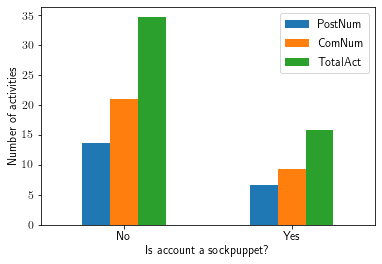

In [43]:
df_users_act.groupby("isPuppet").mean().rename(index={"t": "Yes", "f": "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Number of activities")

<AxesSubplot:xlabel='Strategies for sockpuppets', ylabel='Number of activities'>

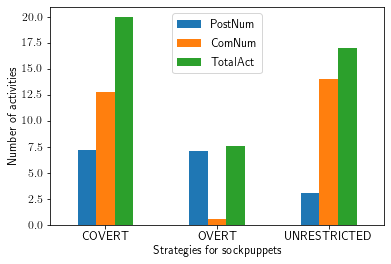

In [44]:
df_users_act.groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategies for sockpuppets", ylabel="Number of activities")

## influence

In [16]:
topic_polarity = {}

for t, p in zip(df_users_final["topic_1"], df_users_final["pos_1"]):
    if t not in topic_polarity:
        topic_polarity[t] = set([p])
    else:
        topic_polarity[t] |= set([p])
        
print(topic_polarity)

{nan: {nan}, 'How likely is it that the Dow Jones will end the year 2020 down at least 20% from its peak in February 2020?': {'Yes', 'No'}, 'How strongly would you approve or disapprove of a two percent annual tax on households whose net worth (including income, real estate, stocks and other investments) is more than 50 million?': {'Strongly disapprove', 'Strongly approve'}, 'How strongly do you favor or oppose the use of nuclear energy as one of the ways to provide electricity for the United States?': {'Strongly favor', 'Strongly oppose'}, 'How likely is it that the United States experience a terrorist attack in the next ten years that will kill more than 1000 American civilians?': {'Very likely', 'Very unlikely'}, 'How should the United States balance protection of the environment and economy growth?,Protection of the environment should be given priority': {'Economic growth should be given priority, even if the environment suffers to some extent.', ' even at the risk of curbing econo

In [31]:
df_follow

,createdAt,updatedAt,FollowerId,FollowingId
0,2020-09-01 20:32:51.454+00,2020-09-01 20:32:51.454+00,1980,1981
1,2020-09-03 02:00:20.287+00,2020-09-03 02:00:20.287+00,2580,1980
2,2020-09-03 02:35:13.799+00,2020-09-03 02:35:13.799+00,1980,1976
3,2020-09-03 02:40:55.826+00,2020-09-03 02:40:55.826+00,2593,1980
4,2020-09-03 02:58:43.612+00,2020-09-03 02:58:43.612+00,2679,2657
...,...,...,...,...
171,2020-09-07 22:10:04.674+00,2020-09-07 22:10:04.674+00,2391,2388
172,2020-09-07 22:24:46.833+00,2020-09-07 22:24:46.833+00,2389,2388
173,2020-09-08 01:11:55.046+00,2020-09-08 01:11:55.046+00,2687,2610
174,2020-09-08 11:21:36.381+00,2020-09-08 11:21:36.381+00,2388,2390


In [34]:
dict_followby = {}
for u1, u2 in zip(df_follow["FollowerId"], df_follow["FollowingId"]):
    if u2 not in dict_followby:
        dict_followby[u2] = set()
    dict_followby[u2] |= set([u1])

In [69]:
df_users_inf = df_users_final[["id", "isPuppet", "strategy", "PostNum", "ComNum", "TotalAct"]]

display(df_users_inf)

,id,isPuppet,strategy,PostNum,ComNum,TotalAct
0,2291,f,NaN,NaN,NaN,NaN
1,1976,f,NaN,1.0,0.0,1.0
2,1977,f,NaN,NaN,NaN,NaN
3,2292,f,NaN,NaN,NaN,NaN
4,1980,f,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
473,2407,t,COVERT,2.0,0.0,2.0
474,2704,f,NaN,26.0,27.0,53.0
475,2575,f,NaN,20.0,39.0,59.0
476,2540,t,COVERT,8.0,12.0,20.0


In [70]:
dict_u_act = dict(zip(df_users_inf["id"], df_users_inf["TotalAct"].fillna(0)))

dict_u_inf_on = {u: {"inf": sum([dict_u_act[u2] for u2 in dict_followby[u]]) if u in dict_followby else 0} for u in dict_u_act}

df_users_inf = df_users_inf.merge(pd.DataFrame.from_dict(dict_u_inf_on, orient="index"), left_on="id", right_index=True)

In [93]:
df_users_inf["AdjInf"] = (df_users_inf["TotalAct"] / df_users_inf["inf"]).replace(np.inf, 1).replace(np.nan, 0)

df_users_inf

,id,isPuppet,strategy,PostNum,ComNum,TotalAct,inf,AdjInf
0,2291,f,NaN,NaN,NaN,NaN,0.0,0.000000
1,1976,f,NaN,1.0,0.0,1.0,0.0,1.000000
2,1977,f,NaN,NaN,NaN,NaN,0.0,0.000000
3,2292,f,NaN,NaN,NaN,NaN,0.0,0.000000
4,1980,f,NaN,NaN,NaN,NaN,159.0,0.000000
...,...,...,...,...,...,...,...,...
473,2407,t,COVERT,2.0,0.0,2.0,0.0,1.000000
474,2704,f,NaN,26.0,27.0,53.0,89.0,0.595506
475,2575,f,NaN,20.0,39.0,59.0,156.0,0.378205
476,2540,t,COVERT,8.0,12.0,20.0,105.0,0.190476


<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Follower activities'>

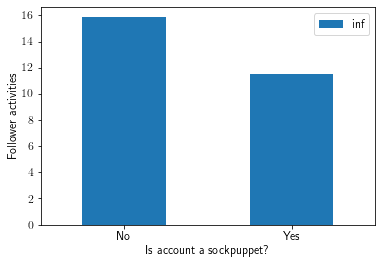

In [76]:
df_users_inf[["isPuppet", "inf"]].groupby("isPuppet").mean().rename(index={"t": "Yes", "f": "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Follower activities")

<AxesSubplot:xlabel='Strategy for sockpuppet', ylabel='Follower activities'>

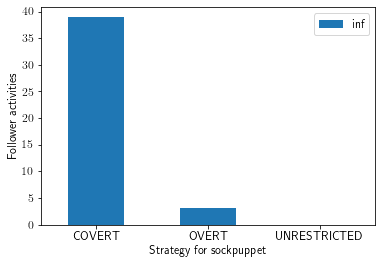

In [78]:
df_users_inf[["strategy", "inf"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategy for sockpuppet", ylabel="Follower activities")

<AxesSubplot:xlabel='Is account a sockpuppet?', ylabel='Direct Influence'>

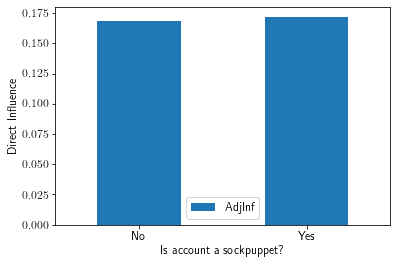

In [95]:
df_users_inf.replace(np.inf, np.nan)[["isPuppet", "AdjInf"]].groupby("isPuppet").mean().rename(index={"t": "Yes", "f": "No"}).plot(kind="bar", rot=0, xlabel="Is account a sockpuppet?", ylabel="Direct Influence")

<AxesSubplot:xlabel='Strategy for sockpuppet', ylabel='Direct Influence'>

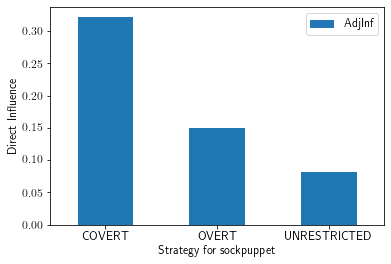

In [94]:
df_users_inf.replace(np.inf, 1)[["strategy", "AdjInf"]].groupby("strategy").mean().plot(kind="bar", rot=0, xlabel="Strategy for sockpuppet", ylabel="Direct Influence")

In [17]:
df_posts["root_id"][~df_posts["root_id"].isna()].astype(int)

25        93
26       109
54       129
103       93
147      150
        ... 
1047     996
1056    1010
1061    1032
1068    1042
1069    1036
Name: root_id, Length: 123, dtype: int64

In [18]:
df_posts.tail()

,id,text,picture_url,parent_id,root_id,is_marked,tags,createdAt,updatedAt,AuthorId,is_trending
1079,1172,US corona virus surge: ‘It’s a failure of nati...,NaN,NaN,NaN,False,"{corona,Biden2020}",2020-09-08 16:43:12.02+00,2020-09-08 16:43:12.057+00,2622,False
1080,1173,well-put. it's portrayed as some sort of utopi...,NaN,NaN,NaN,False,"{failure,covid,govt,us}",2020-09-08 17:01:55.375+00,2020-09-08 17:01:55.394+00,2709,False
1081,1174,Coronavirus future in America will be whack-a-...,NaN,NaN,NaN,False,{corona},2020-09-08 18:02:40.907+00,2020-09-08 18:02:40.929+00,2622,False
1082,1175,"The Bottom Line:\n""We need synchronized swimmi...",NaN,NaN,NaN,False,{covid},2020-09-08 18:08:46.315+00,2020-09-08 18:08:46.354+00,2622,False
1083,1176,This is what is at stake when you go to the po...,NaN,NaN,NaN,False,{covid},2020-09-08 18:10:55.71+00,2020-09-08 18:10:55.719+00,2622,False


In [19]:
df_posts_puppet = df_posts[df_posts["AuthorId"].isin(df_puppet["id"].tolist())]
display(df_posts_puppet.head())

,id,text,picture_url,parent_id,root_id,is_marked,tags,createdAt,updatedAt,AuthorId,is_trending
24,117,American has seen itself as the policeman and ...,NaN,NaN,NaN,False,"{""""}",2020-09-03 05:53:41.91+00,2020-09-03 05:53:42.052+00,2540,False
25,118,Absolutely! The preservation of the environmen...,NaN,93.0,93.0,False,NaN,2020-09-03 06:05:01.123+00,2020-09-03 06:05:01.135+00,2444,False
26,119,"Of course! The economy can wait, destruction o...",NaN,109.0,109.0,False,NaN,2020-09-03 06:08:59.136+00,2020-09-03 06:08:59.147+00,2444,False
27,120,"So, I don't know about you, but I'm about done...",https://dartmouth-socialplatform.s3.amazonaws....,NaN,NaN,False,{covid},2020-09-03 06:14:12.939+00,2020-09-04 13:08:51.133+00,2542,False
29,122,Am I the only one terrified of the unknown dan...,NaN,NaN,NaN,False,"{""""}",2020-09-03 08:26:01.216+00,2020-09-03 08:26:01.23+00,2443,False


In [20]:
print(df_comments.shape)
df_comments[df_comments["PostId"].isin(df_posts_puppet["id"].tolist())]

(1622, 6)


,id,text,createdAt,updatedAt,PostId,CommenterId
86,177,I'm with you on this one. We have no idea how ...,2020-09-03 10:35:17.364+00,2020-09-03 10:35:17.373+00,122,2702
102,175,"I don't like wearing a mask either, but it is ...",2020-09-03 10:34:39.514+00,2020-09-03 10:34:39.521+00,120,2750
103,176,I agree that the government has not done enoug...,2020-09-03 10:35:17.216+00,2020-09-03 10:35:17.223+00,120,2750
139,237,GMO foods use less pesticides to grow and are ...,2020-09-03 12:21:33.932+00,2020-09-03 12:21:36.677+00,122,2497
151,240,I am terrified at the number of people that wo...,2020-09-03 12:22:54.276+00,2020-09-03 12:22:54.287+00,122,2481
...,...,...,...,...,...,...
1614,1701,"After today and yesterday, hearing from Vetera...",2020-09-08 11:30:20.486+00,2020-09-08 11:30:20.502+00,908,2390
1615,1702,I'm tending to start to change my mind. I'm NO...,2020-09-08 11:31:36.102+00,2020-09-08 11:31:36.118+00,905,2390
1616,1706,This is a good point and one that is important...,2020-09-08 11:40:37.975+00,2020-09-08 11:40:37.982+00,563,2390
1617,1703,Green tech could answer a lot of our problems....,2020-09-08 11:32:35.083+00,2020-09-08 11:32:35.099+00,620,2390


### Graph 1

+ x-axis: time t = 1,..,6
+ y-axis: f(t)=% of socks created by strategy S that were detected within t units of creation. 


4 curves using S = the 3 strategies provided to sock operators plus ALL (all socks, regardless of strategy)

<AxesSubplot:xlabel='strategy', ylabel='Number of discovered'>

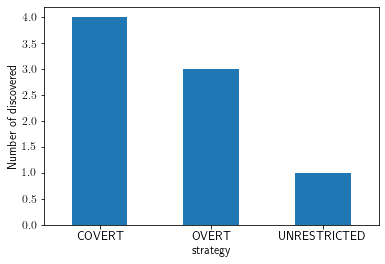

In [21]:
(df_puppet[~df_puppet["ReportToLast"].isna()].groupby("strategy").size()).plot(kind="bar", rot=0, ylabel="Number of discovered")

<AxesSubplot:xlabel='strategy', ylabel='Average days to discover'>

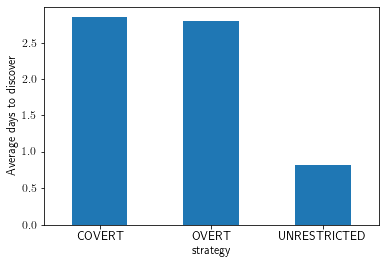

In [22]:
(df_puppet.groupby("strategy").mean()["ReportToLast"] + 6).plot(kind="bar", rot=0, ylabel="Average days to discover")

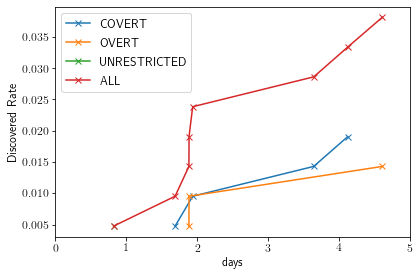

In [23]:
x = (df_puppet["ReportToLast"] + 6).sort_values().tolist()
y = np.arange(1, len(x) + 1)/210

x1 = (df_puppet[df_puppet["strategy"] == "COVERT"]["ReportToLast"] + 6).sort_values().tolist()
y1 = np.arange(1, len(x1) + 1)/210

x2 = (df_puppet[df_puppet["strategy"] == "OVERT"]["ReportToLast"] + 6).sort_values().tolist()
y2 = np.arange(1, len(x2) + 1)/210

x3 = (df_puppet[df_puppet["strategy"] == "UNRESTRICTED"]["ReportToLast"] + 6).sort_values().tolist()
y3 = np.arange(1, len(x3) + 1)/210

# y2 = np.arange(1, len(x) + 1)

fig_1 = plt.figure()
ax = fig_1.subplots()
# ax2 = ax.twinx()

l1, = ax.plot(x1, y1, marker="x", label="COVERT")
l2, = ax.plot(x2, y2, marker="x", label="OVERT")
l2, = ax.plot(x3, y3, marker="x", label="UNRESTRICTED")
l4, = ax.plot(x, y, marker = "x", label="ALL")
# ax2.plot(x,)

ax.set_xticks(np.arange(0, 6))
ax.set_xlabel("days")
ax.set_ylabel("Discovered Rate")
# ax2.set_ylabel("Discovered Number")
ax.legend()

fig_1.tight_layout()

### Graph 2

+ x-axis: time t = 1,..,6
+ y-axis:
    - f(t)=% of retweets of all sock posts upto time t,regardless of whether the socks where discovered or not.
    - f(t)=% of retweets of all sock posts upto time t which were not discovered by time t
    - f(t)=% of retweets of all sock posts upto time t there were never discovered.

3 curves in all

**This is not possible**

In [24]:
# fig_1.savefig("./figures/graph1.pdf")